# Classifying Online Text Reviews

In this project I will try to classify online reviews of customers for amazon alexa products

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews
---


In [1]:
# İmporting necessary libraries 
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0.alpha0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0.alpha0


In [2]:
# I will us dataset from my drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_alexa = pd.read_csv('/content/drive/My Drive/amazon_alexa.tsv', sep='\t')


# Chapter 1 
After loading data let's see it

In [4]:
df_alexa.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


We hace date, rating, variaton of Alexa product colour , verified reviews and finally feedback

In [7]:
df_alexa.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
df_alexa["verified_reviews"].head(10)


0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
5    I received the echo as a gift. I needed anothe...
6    Without having a cellphone, I cannot use many ...
7    I think this is the 5th one I've purchased. I'...
8                                          looks great
9    Love it! I’ve listened to songs I haven’t hear...
Name: verified_reviews, dtype: object

# Chapter 2 
Seperation and investigation 
If feedback equals 1 we'll assume that it is positive 
and if it is o we'll assume it as negative 

In [8]:
positive = df_alexa[df_alexa['feedback']==1]
negative = df_alexa[df_alexa['feedback']==0]

In [9]:
print(positive.shape, "positive reviews ")
print(negative.shape, "negative reviews ")

(2893, 5) positive reviews 
(257, 5) negative reviews 


We have positive reviews moch more than negative ones so we have a unbalanced dataset. 

In [10]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


let's check visually dataset for different columns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


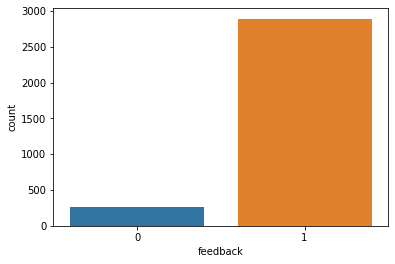

In [11]:
sns.countplot(df_alexa['feedback'], label = "Count") 

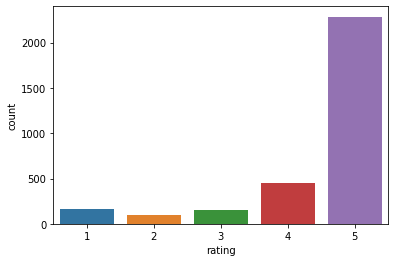

In [12]:
sns.countplot(x = 'rating', data = df_alexa)

Again most of the ratings are positive with maximum possible rating score as 5 

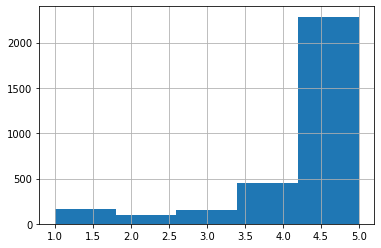

In [13]:
df_alexa['rating'].hist(bins = 5)

Also we have variation column for color let's check for that as well if there is any relation with variation  

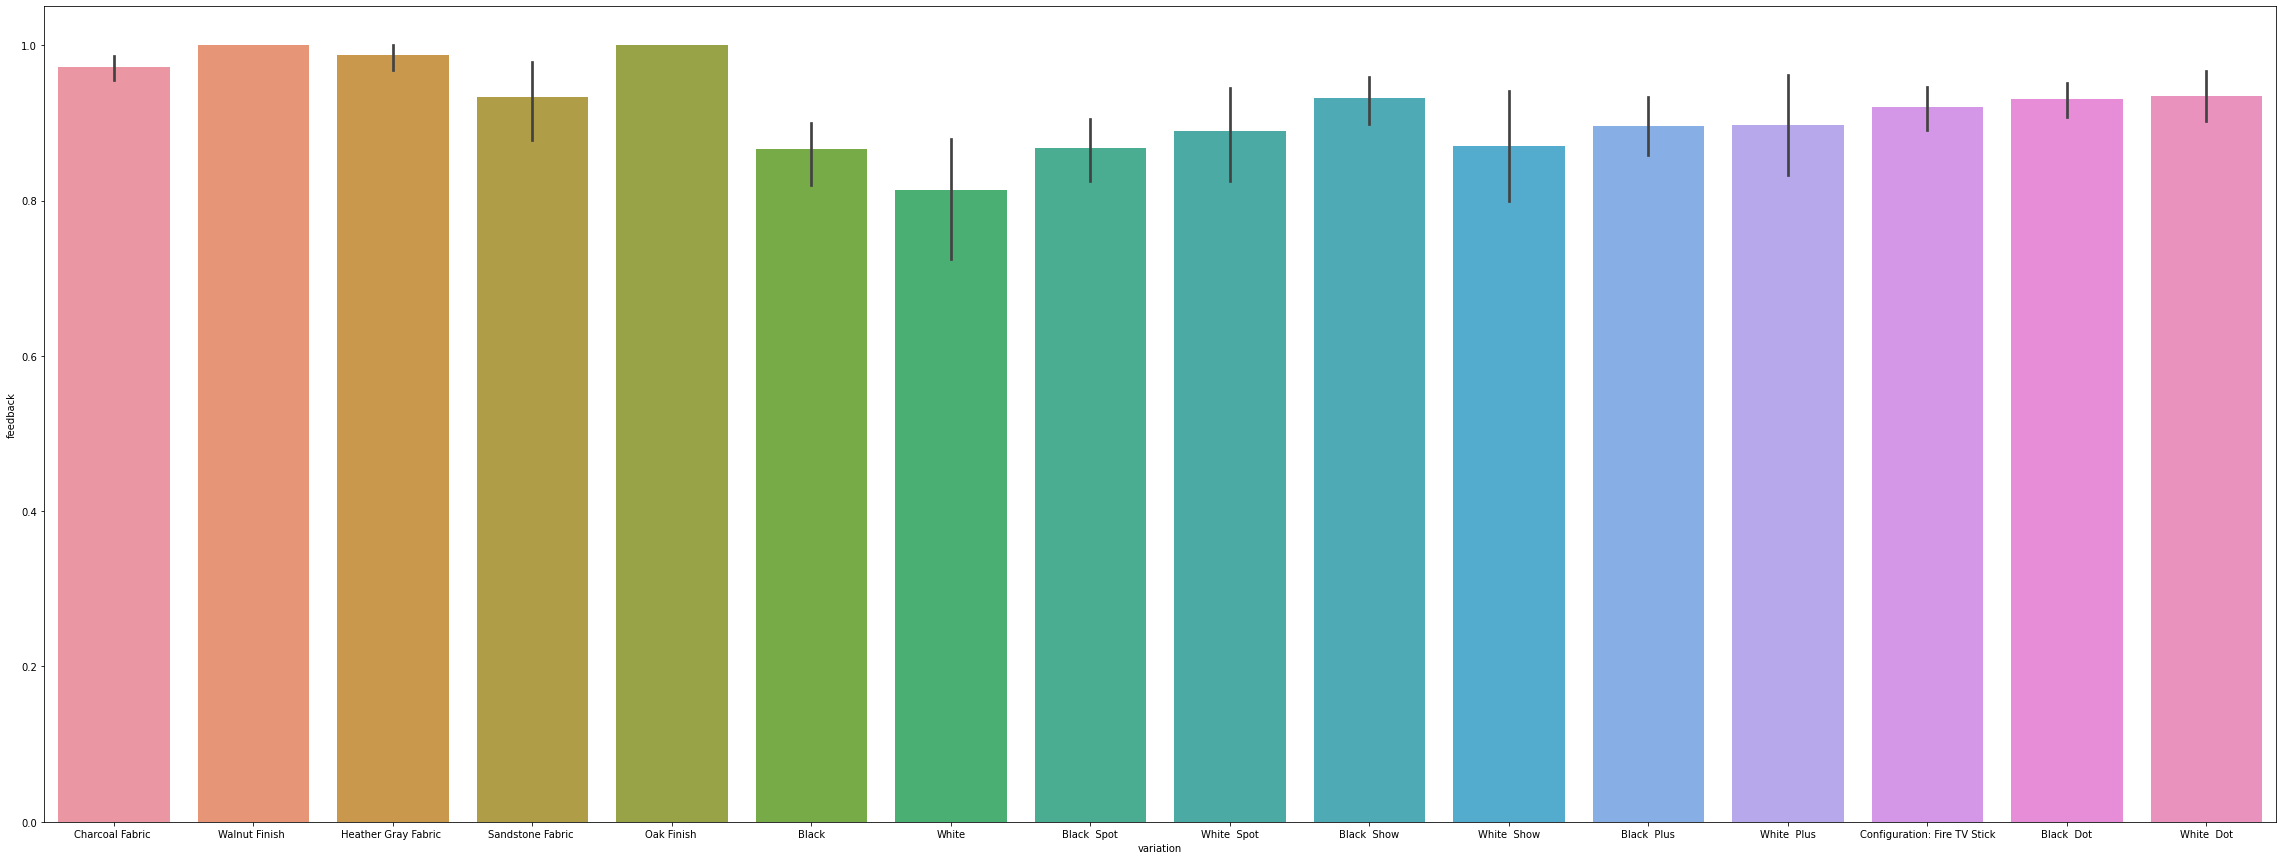

In [17]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='feedback', data=df_alexa)

Distrubiton looks similar

# Chapter 3
Cleaning

I don't think date will be useful so for simplicity I am dropping it and I am trying to predict if a comment is positive or negative. Rating could be useful for multi-class classification however right now I will focus on a binary decision 

In [16]:
# Dropping date and rate 
df_alexa = df_alexa.drop(['date', 'rating'],axis=1)
df_alexa.head(10)

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
5,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,Heather Gray Fabric,looks great,1
9,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


I am going to change variatin column to categorical input since I have different classes 

In [24]:
uniqueVar = df_alexa["variation"].unique()
print("number of variations : ",uniqueVar.shape )
print(uniqueVar)

number of variations :  (16,)
['Charcoal Fabric ' 'Walnut Finish ' 'Heather Gray Fabric '
 'Sandstone Fabric ' 'Oak Finish ' 'Black' 'White' 'Black  Spot'
 'White  Spot' 'Black  Show' 'White  Show' 'Black  Plus' 'White  Plus'
 'Configuration: Fire TV Stick' 'Black  Dot' 'White  Dot']


In [26]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first = True) # getdummies helps to convert categorical data

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
df_alexa.drop(['variation'], axis=1, inplace=True) # I will drop this column to add new one I set inplace = true so it would 
# change original table in memory


In [28]:
df_alexa

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


now I will add categorical verison to data

In [29]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)
df_alexa.head(5)

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Chapter 4 
Tokenizing words to make network understand from the sentences by representing each word with an index. We are basically vectorizing sentences.
---
I will use sklearn's CountVectorizer 


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])
alexa_countvectorizer.shape

(3150, 4044)

In [37]:
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [38]:
print(vectorizer.get_feature_names())# every unique word 

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print(alexa_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Now I can drop comments in text and use vectorized form instead.

In [40]:
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())
# Now I can add them
df_alexa = pd.concat([df_alexa, reviews], axis=1)
df_alexa.head(5)

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now I can seperate my inputs and labels. Of course label will be feedback and rest will be input

In [41]:
y = df_alexa['feedback'] # labels

In [42]:
X = df_alexa.drop(['feedback'],axis=1) # inputs

# Chapter 5 
Creating model and training

first I will split my test and taining set with 20 percent and 80 percent 

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [44]:
X_test.shape #  I will use it to determine input shape of my network. 

(630, 4059)

Let's create model

*   I will use Rectified Linear Unit in hidden layers to catchnon-linear relations. It is has positive derivative always and it prevents gradient vanishing. 

*   I will use single neuron with activation function of sigmoid at the and of network to return a probablity of belonging that specified class

*   I have tried different numbers for neurons and layers. I was able to improve model. But It doesn't get better than currenty provided model below.  


In [85]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4059, ))) # number of columns 
ANN_classifier.add(tf.keras.layers.Dense(units=200, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=200, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



*   Since I have 2 possible outcomes I can evaluate by binary_crossentropy which is used generally for classification tasks 
*   As optimizier I will use adaptive moment estimation.



In [86]:
ANN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [87]:
epochs_hist = ANN_classifier.fit(X_train, y_train,validation_split=0.20, epochs = 10)

Epoch 1/10
63/63 [==============================] - 2s 20ms/step - loss: 0.2797 - accuracy: 0.9107 - val_loss: 0.1714 - val_accuracy: 0.9286
Epoch 2/10
63/63 [==============================] - 1s 16ms/step - loss: 0.1002 - accuracy: 0.9658 - val_loss: 0.1652 - val_accuracy: 0.9246
Epoch 3/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.2972 - val_accuracy: 0.9306
Epoch 4/10
63/63 [==============================] - 1s 16ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.3387 - val_accuracy: 0.9306
Epoch 5/10
63/63 [==============================] - 1s 16ms/step - loss: 0.0140 - accuracy: 0.9945 - val_loss: 0.3813 - val_accuracy: 0.9286
Epoch 6/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0135 - accuracy: 0.9940 - val_loss: 0.4425 - val_accuracy: 0.9325
Epoch 7/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.3618 - val_accuracy: 0.9325
Epoch 8/10
63

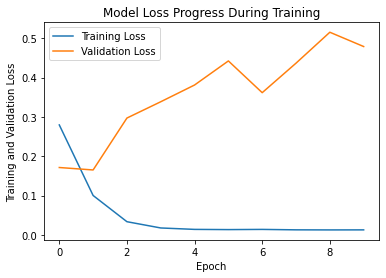

In [88]:

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
     

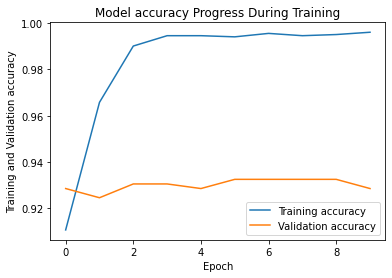

In [89]:
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
     

After second epoch validation loss increases and validation acurracy stays still. which means model does not keep learning.  

# Chapter 6 
Evaluation

Now I can use confusion matrix to evaluate performance of model.

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
y_pred_test = ANN_classifier.predict(X_test)

y_pred_test = (y_pred_test > 0.5)# I am classifyng any value greater than 0.5 as 1 and 0 as if it is less than 0.5

print(y_pred_test[:10])


20/20 [==============================] - 0s 6ms/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


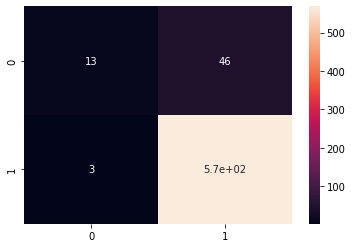

In [92]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

When we look at the confusion matrix we have

* True Negative = 13
* True Positive =  570
* False Positive = 46 
* False negative = 3  




In [95]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.22      0.35        59
           1       0.93      0.99      0.96       571

    accuracy                           0.92       630
   macro avg       0.87      0.61      0.65       630
weighted avg       0.91      0.92      0.90       630

